# **GIỚI THIỆU VỀ ĐAU TIM**

> Một cơn đau tim (Bệnh tim mạch) xảy ra khi dòng máu đến cơ tim đột nhiên bị tắc nghẽn. Theo thống kê của WHO mỗi năm có 17,9 triệu người chết vì nhồi máu cơ tim. Nghiên cứu y học cho rằng lối sống của con người là nguyên nhân chính đằng sau vấn đề về tim này. Ngoài ra, có nhiều yếu tố chính cảnh báo rằng người đó có thể/không thể có nguy cơ bị đau tim.

> <img style="float: centre;" src="https://img.lovepik.com/photo/50074/6189.jpg_wh860.jpg" width="600px"/>

> Bộ dữ liệu này chứa một số thông tin y tế của bệnh nhân cho biết liệu người đó có nguy cơ bị đau tim ít hay nhiều. Sử dụng thông tin khám phá tập dữ liệu và phân loại biến mục tiêu bằng các mô hình Machine Learning khác nhau và tìm ra thuật toán nào phù hợp với tập dữ liệu này.

## Mục lục
1) Các thư viện sử dụng

2) Bộ dữ liệu

2) EDA

3) Chuẩn bị các mô hình ML

4) Đánh giá mô hình

5) Ensembling

6) Kết luận

## Các thư viện sử dụng

In [1]:
%matplotlib inline
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#EDA
from collections import Counter
import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

/tmp/ipykernel_11715/3901802382.py:11: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [2]:
# !pip install seaborn
# !pip install pandas-profiling
# !pip install xgboost
# !pip install mlxtend 

## Bộ dữ liệu sử dụng

Nguồn: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download

Tập dữ liệu này có từ năm 1988 và bao gồm bốn cơ sở dữ liệu: Cleveland, Hungary, Thụy Sĩ và Long Beach V. Tập dữ liệu này chứa 76 thuộc tính, bao gồm cả thuộc tính dự đoán, nhưng tất cả các thử nghiệm đã xuất bản đều đề cập đến việc sử dụng một tập hợp con gồm 14 trong số đó. Trường "target" đề cập đến sự hiện diện của bệnh tim ở bệnh nhân. Nó là số nguyên có giá trị 0 = không bệnh và 1 = bệnh.

Thông tin về thuộc tình:
1. age: tuổi
2. sex: giới tính
3. cp: loại đau ngực (4 giá trị)
4. trestbps: huyết áp khi nghỉ ngơi
5. chol: cholestoral huyết thanh tính bằng mg/dl
6. fbs: đường huyết lúc đói > 120 mg/dl
7. restecg: kết quả điện tâm đồ lúc nghỉ (giá trị 0,1,2)
8. thalach: nhịp tim tối đa đạt được
9. exang: đau thắt ngực do tập thể dục
10. oldpeak: ST chênh xuống do gắng sức so với nghỉ ngơi
11. slope: độ dốc của đoạn ST tập thể dục đỉnh
12. ca: số lượng tàu chính (0-3) được tô màu bằng bột
13. thal: 0 = bình thường; 1 = lỗi cố định; 2 = khiếm khuyết có thể đảo ngược
14. target: giá trị 0 = không bệnh và 1 = bệnh

Tên và số an sinh xã hội của bệnh nhân gần đây đã bị xóa khỏi cơ sở dữ liệu, được thay thế bằng các giá trị giả.

In [3]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## **EDA**

In [5]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Chuẩn bị mô hình

In [6]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

**Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem**

In [7]:
print(y_test.unique())
Counter(y_train)

[1 0]


Counter({1: 419, 0: 401})

In [8]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
315,42,1,3,148,244,0,0,178,0,0.8,2,2,2
204,66,0,2,146,278,0,0,152,0,0.0,1,1,2
363,53,1,2,130,246,1,0,173,0,0.0,2,3,2
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
192,67,0,2,115,564,0,0,160,0,1.6,1,0,3
629,65,1,3,138,282,1,0,174,0,1.4,1,1,2
559,67,1,0,120,237,0,1,71,0,1.0,1,0,2


### Chuẩn hóa các trường thuộc tính (trừ mục tiêu)

$$z= \frac{x-mean(x)}{std(s)}$$

In [9]:
values= (X_train['age'] - np.mean(X_train['age']))/np.std(X_train['age'])
values

315    -1.405034
204     1.262700
363    -0.182322
5       0.373456
1017   -0.182322
          ...   
835    -0.626945
192     1.373856
629     1.151545
559     1.373856
684     0.595767
Name: age, Length: 820, dtype: float64

In [10]:
# Dùng hàm StandardScaler cho nhanh
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-1.40503359,  0.64895597,  1.97748631, ...,  0.97028605,
         1.17427458, -0.5144228 ],
       [ 1.26270023, -1.5409366 ,  1.01170979, ..., -0.6668221 ,
         0.21616   , -0.5144228 ],
       [-0.18232226,  0.64895597,  1.01170979, ...,  0.97028605,
         2.13238916, -0.5144228 ],
       ...,
       [ 1.15154465,  0.64895597,  1.97748631, ..., -0.6668221 ,
         0.21616   , -0.5144228 ],
       [ 1.3738558 ,  0.64895597, -0.91984324, ..., -0.6668221 ,
        -0.74195458, -0.5144228 ],
       [ 0.59576677,  0.64895597,  1.01170979, ..., -0.6668221 ,
        -0.74195458, -0.5144228 ]])

## **Các mô hình ML**

Sử dụng thuật toán học máy khác nhau và cố gắng tìm thuật toán dự đoán tốt:
1. Logistic Regression
    https://machinelearningcoban.com/2017/01/27/logisticregression/
2. Naive Bayes
    https://machinelearningcoban.com/2017/08/08/nbc/
3. Random Forest Classifier
    https://machinelearningcoban.com/tabml_book/ch_model/random_forest.html
4. Extreme Gradient Boost
    https://machinelearningmastery.com/extreme-gradient-boosting-ensemble-in-python/
5. K-Nearest Neighbour
    https://machinelearningcoban.com/2017/01/08/knn/
6. Decision Tree
    https://machinelearningcoban.com/tabml_book/ch_model/decision_tree.html
7. Support Vector Machine
    https://machinelearningcoban.com/2017/04/09/smv/

### Logistic Regression

Accuracy: 86.34146341463415 %

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



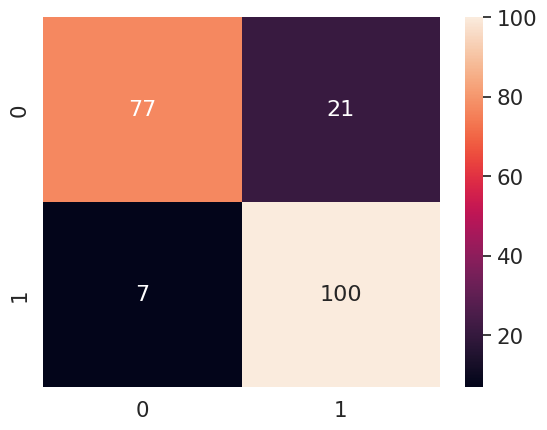

In [11]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
sns.set(font_scale=1.4) # for label size
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', annot_kws={"size": 16}) # font size
lr_acc_score = accuracy_score(y_test, lr_predict)
print("Accuracy:",lr_acc_score*100,'%\n')
print(classification_report(y_test,lr_predict))

### Naive Bayes



Accuracy: 85.36585365853658 

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



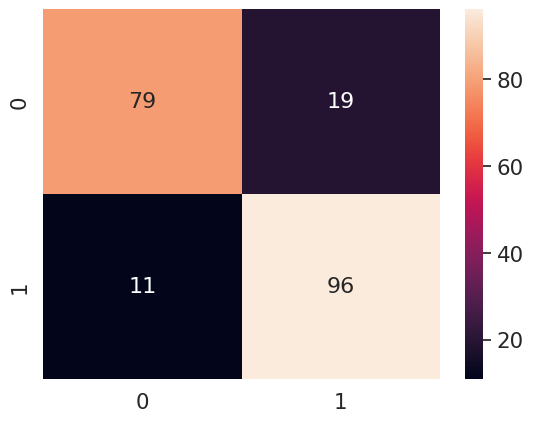

In [12]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
sns.set(font_scale=1.4) # for label size
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', annot_kws={"size": 16}) # font size
nb_acc_score = accuracy_score(y_test, nbpred)
print("\n")
print("Accuracy:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

### Random Forest Classfier

Accuracy: 93.65853658536587 

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        98
           1       0.91      0.97      0.94       107

    accuracy                           0.94       205
   macro avg       0.94      0.93      0.94       205
weighted avg       0.94      0.94      0.94       205



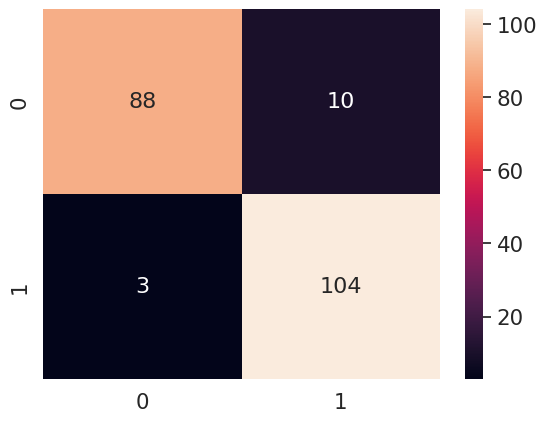

In [13]:
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
sns.set(font_scale=1.4) # for label size
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', annot_kws={"size": 16}) # font size
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("Accuracy:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

### Extreme Gradient Boost

Accuracy 92.19512195121952 

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        98
           1       0.90      0.95      0.93       107

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



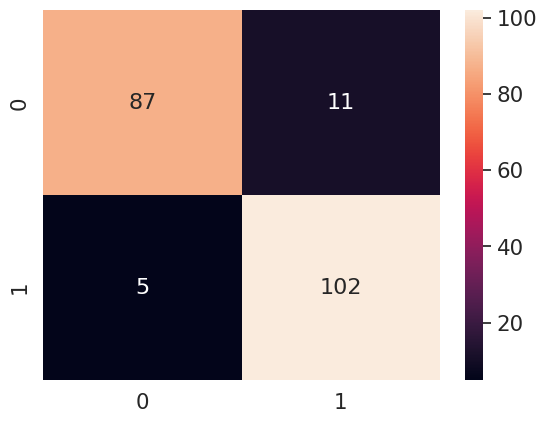

In [14]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
sns.set(font_scale=1.4) # for label size
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', annot_kws={"size": 16}) # font size
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("Accuracy",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

### K-NeighborsClassifier

Accuracy: 87.8048780487805 

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        98
           1       0.87      0.90      0.88       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



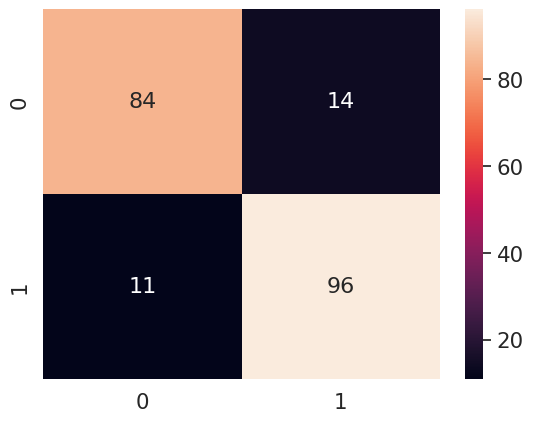

In [15]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
sns.set(font_scale=1.4) # for label size
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', annot_kws={"size": 16}) # font size
print("Accuracy:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

### DecisionTreeClassifier

Accuracy: 94.6341463414634 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        98
           1       0.97      0.93      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



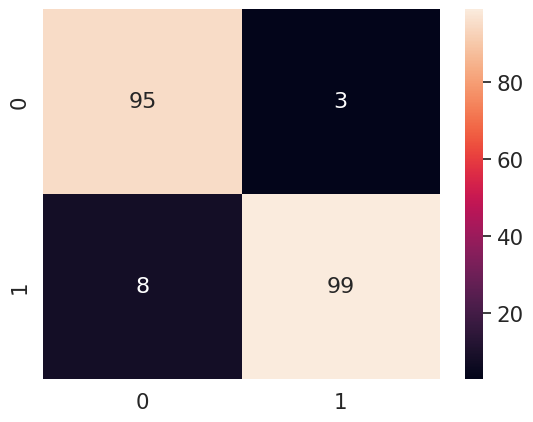

In [16]:
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
sns.set(font_scale=1.4) # for label size
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', annot_kws={"size": 16}) # font size
print("Accuracy:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

### Support Vector Classifier

Accuracy: 98.04878048780488 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        98
           1       0.96      1.00      0.98       107

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



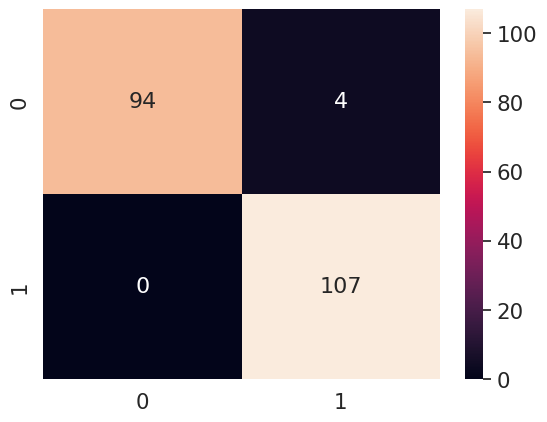

In [17]:
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
sns.set(font_scale=1.4) # for label size
sns.heatmap(svc_conf_matrix, annot=True, fmt='d', annot_kws={"size": 16}) # font size
print("Accuracy:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

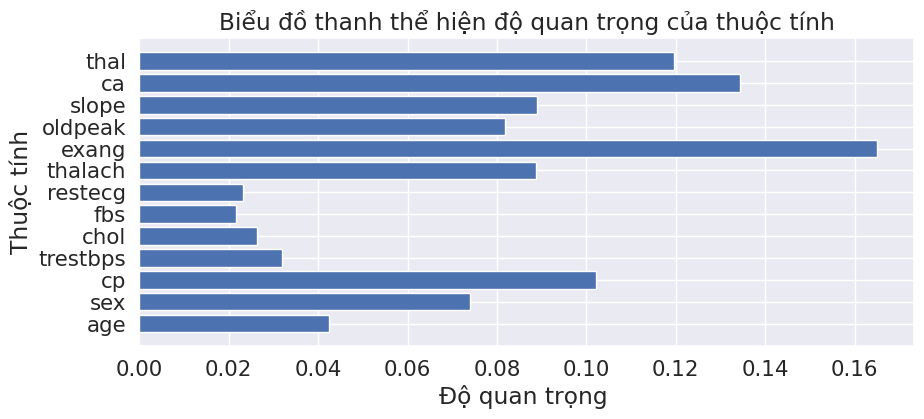

In [18]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("Biểu đồ thanh thể hiện độ quan trọng của thuộc tính")
plt.xlabel("Độ quan trọng ")
plt.ylabel("Thuộc tính")
plt.barh(imp_feature['Feature'],imp_feature['Importance'])
plt.show()

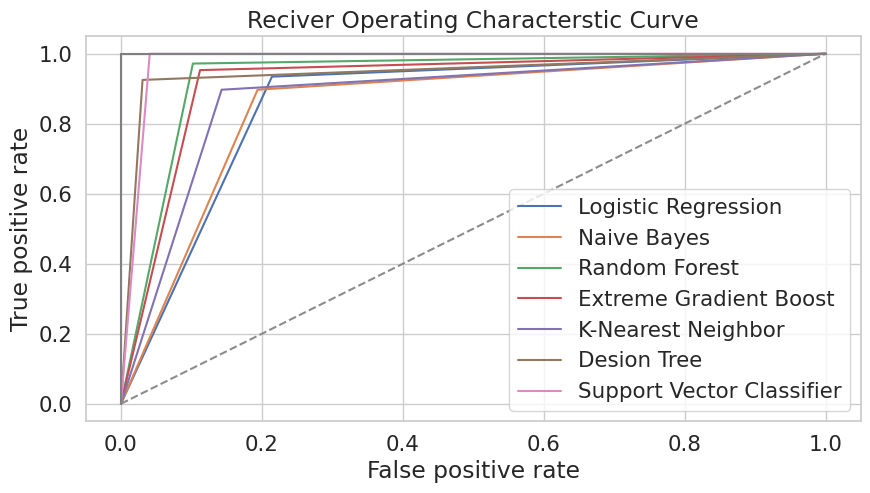

In [19]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

- ROC curve: https://en.wikipedia.org/wiki/Receiver_operating_characteristic
$$ \text{true positive rate} = TPR = \frac{TP}{P} = \frac{TP}{TP-FN}$$
$$ \text{false positive rate} = FPR = \frac{FP}{N} = \frac{FP}{TN+FP}$$

# Đánh giá mô hình

In [20]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,86.341463
1,Naive Bayes,85.365854
2,Random Forest,93.658537
3,Extreme Gradient Boost,92.195122
4,K-Nearest Neighbour,87.804878
5,Decision Tree,94.634146
6,Support Vector Machine,98.048780


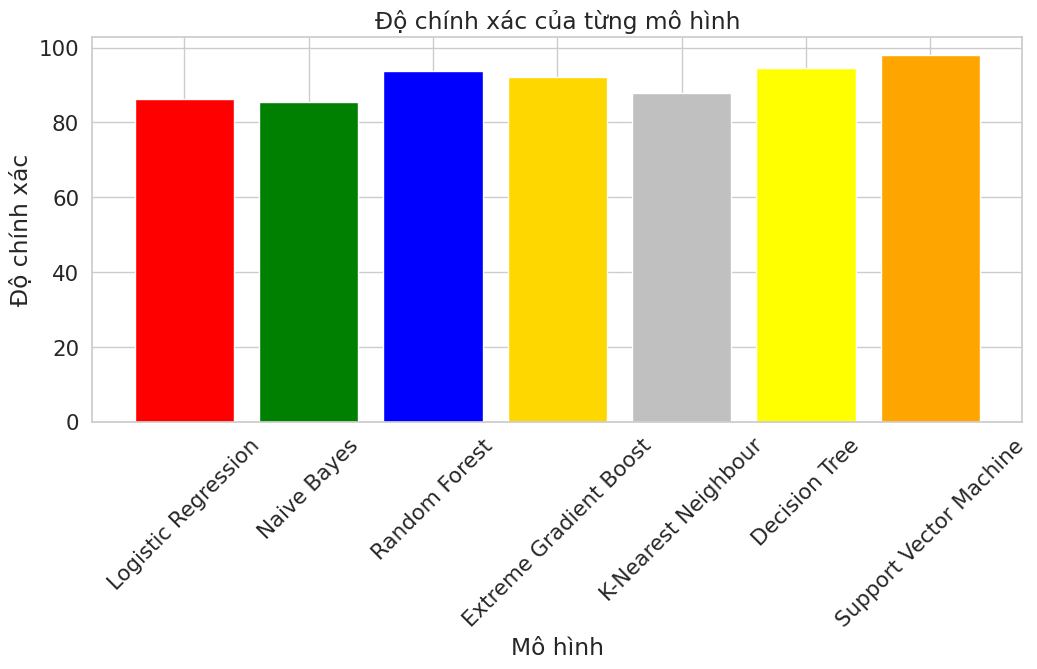

In [21]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("Độ chính xác của từng mô hình")
plt.xlabel("Mô hình")
plt.ylabel("Độ chính xác")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.xticks(rotation= 45)
plt.show()

## **Ensembling**

> **Tăng độ chính xác của mô hình với phương pháp Ensembling.**

Accuracy: 98.04878048780488 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        98
           1       0.96      1.00      0.98       107

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



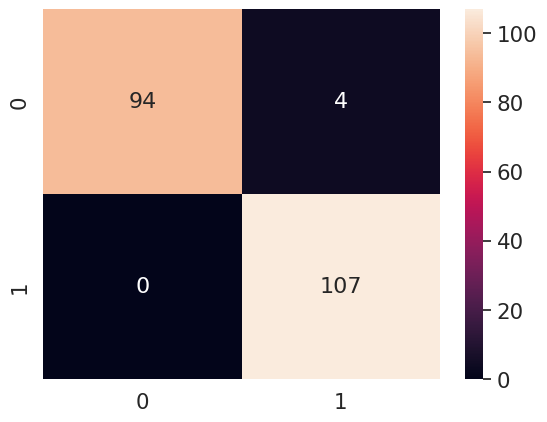

In [22]:
scv=StackingCVClassifier(classifiers=[xgb,knn,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
sns.set(font_scale=1.4) # for label size
sns.heatmap(scv_conf_matrix, annot=True, fmt='d', annot_kws={"size": 16}) # font size
print("Accuracy:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

# **Phần kết luận**

1) Extreme Gradient Boost mang lại Độ chính xác tốt nhất so với các kiểu máy khác.

2) Đau thắt ngực do tập thể dục, đau ngực là triệu chứng chính của cơn đau tim.

3) Kỹ thuật đồng bộ làm tăng độ chính xác của mô hình.